1. 依照课件3中的内容给出测算三角波（triangle_wave（））y1、y2、y3、y4四种方式的计算速度与结果比较的代码，并对其运算显示结果。

In [1]:
import numpy as np
import time

# define triangle_wave function
def triangle_wave(x, c_tri, c_peak, h_peak):
    x = x - int(x) # get fractional part becauce the cycle of triangle wave is 1
    if x >= c_tri:
        y = 0.0 # y means the value of y axis
    elif x < c_peak:
        y = x * h_peak / c_peak
    else:
        y = (x-c_tri) * (h_peak / (c_peak-c_tri))
    return y

x = np.linspace(0, 2, 1000)
# time point 1
start_1 = time.perf_counter()
y_1 = np.array([triangle_wave(i, 0.6, 0.4, 1.0) for i in x])
# time point 2
end_1 = time.perf_counter()
print(f"y1 expands {end_1-start_1} seconds")


triangle_ufunc_1 = np.frompyfunc(triangle_wave, 4, 1)
# time point 3
start_2 = time.perf_counter()
y_2 = triangle_ufunc_1(x, 0.6, 0.4, 1.0)
# time point 4
end_2 = time.perf_counter()
print(f"y2 expands {end_2-start_2} seconds")


triangle_ufunc_2 = np.frompyfunc(lambda x: triangle_wave(x, 0.6, 0.4, 1), 1, 1)
# time point 5
start_3 = time.perf_counter()
y_3 = triangle_ufunc_2(x)
# time point 6
end_3 = time.perf_counter()
print(f"y3 expands {end_3-start_3} seconds")


triangle_ufunc_3 = np.vectorize(triangle_wave, otypes=[np.float64])
# time point 7
start_4 = time.perf_counter()
y_4 = triangle_ufunc_3(x, 0.6, 0.4, 1.0)
end_4 = time.perf_counter()
print(f"y4 expands {end_4-start_4} seconds")

print(np.all(y_1 == y_2))
print(np.all(y_2 == y_3))
print(np.all(y_3 == y_4))

y1 expands 0.0005368550000000027 seconds
y2 expands 0.0005988270000010232 seconds
y3 expands 0.00023639900000205216 seconds
y4 expands 0.00028071799999906943 seconds
True
True
True


2. arr11 = 5-np.arange(1,13).reshape(4,3), 计算所有元素及每一列的和；  
对每一个元素、每一列求累积和；  
计算每一行的累计积；  
计算所有元素的最小值；  
计算每一列的最大值；  
计算所有元素、每一行的均值；  
计算所有元素、每一列的中位数；  
计算所有元素的方差，每一行的标准差。  

In [2]:
import numpy as np

# create data
arr_1 = 5 - np.arange(1, 13).reshape(4, 3)

# calculate sum of each column
print(f"the sum of each column is {np.sum(arr_1, axis=0)}")
# calculate the cumulative sum of each element
print(f"the cumulative sum of each element is {np.cumsum(arr_1)}")
# calculate the cumulative sum of each column
print(f"the cumulative sum of each column is: \n {np.cumsum(arr_1, axis=0)}")
# calculate the cumulative product of each row
print(f"the cumulative product of each row is: \n{np.cumprod(arr_1, axis=1)}")
# calculate min of all elements
print(f"the min value of all elements is {np.min(arr_1)}")
# calculate the max of each column
print(f"the max value of each column is {np.max(arr_1, axis=0)}")
# calculate the average of all elements
print(f"the mean value of all elements is {np.mean(arr_1)}")
# calculate the average of each row
print(f"the mean value of each row is {np.mean(arr_1, axis=1)}")
# calculate the median of all elements
print(f"the median of all elements is {np.median(arr_1)}")
# calcualte the median of each column
print(f"the median of each column is {np.median(arr_1, axis=0)}")
# calculate the variance of all elements
print(f"the variance of all elements is {np.var(arr_1)}")
# calculate the standard deviation of each row
print(f"the standard deviation of each row is {np.std(arr_1, axis=1)}")

the sum of each column is [ -2  -6 -10]
the cumulative sum of each element is [  4   7   9  10  10   9   7   4   0  -5 -11 -18]
the cumulative sum of each column is: 
 [[  4   3   2]
 [  5   3   1]
 [  3   0  -3]
 [ -2  -6 -10]]
the cumulative product of each row is: 
[[   4   12   24]
 [   1    0    0]
 [  -2    6  -24]
 [  -5   30 -210]]
the min value of all elements is -7
the max value of each column is [4 3 2]
the mean value of all elements is -1.5
the mean value of each row is [ 3.  0. -3. -6.]
the median of all elements is -1.5
the median of each column is [-0.5 -1.5 -2.5]
the variance of all elements is 11.916666666666666
the standard deviation of each row is [0.81649658 0.81649658 0.81649658 0.81649658]


3. 在数组[1, 2, 3, 4, 5]中每相邻两个数字中间插入两个0

In [3]:
arr_2 = np.array([1, 2, 3, 4, 5])

for i in range(len(arr_2)):
    arr_2 = np.insert(arr_2, np.where(arr_2 == i+1)[0][0], [0, 0])

print(arr_2)


[0 0 1 0 0 2 0 0 3 0 0 4 0 0 5]


4. 归一化，将矩阵规格化到0～1，即最小的变成0，最大的变成1，最小与最大之间的等比缩放。试对Z = np.random.random((5,5))进行归一化。

In [4]:
np.random.seed(1026)
z = np.random.random((5, 5))

def normalization(x):
    min_x = np.min(x)
    max_x = np.max(x)
    result = (x-min_x) / (max_x-min_x)

    return result

print(normalization(z))

[[0.33911304 0.87412518 1.         0.15854379 0.38122249]
 [0.2668365  0.70647226 0.04477112 0.         0.87791292]
 [0.11355699 0.54382964 0.35584635 0.66999999 0.94904989]
 [0.78396858 0.63934665 0.66972279 0.12357888 0.27952779]
 [0.73018948 0.27691111 0.67533854 0.37772504 0.89328116]]


5. 找出数组中与给定值最接近的数（通用方法）。（例：任一数组Z=array([[0,1,2,3],[4,5,6,7]])，给任一定值z=5.1，如何找出Z中的5）

In [5]:
arr_3 = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7]])

z = 5.1

print(f"the nearest number of z is {arr_3[np.where(np.abs(z-arr_3) == np.min(np.abs(z-arr_3)))][0]}")

the nearest number of z is 5


6. 解方程：3x + 6y -5z = 12；x-3y+2z = -2；5x -y +4z = 10。

In [10]:
unknown_variable = np.array([[3, 1, 5], [6, -3, -1], [-5, 2, 4]])
c = np.array([12, -2, 10])

print(f"the x, y, z is {np.linalg.solve(unknown_variable, c)} respectively")

the x, y, z is [-0.125  -0.4375  2.5625] respectively


7. 参见课件4第46页，对g(y)在100个切比雪夫节点之上分別使用Polynomial（Polynomial.fit）和Chebyshev（Chebyshev.fit）进行插值，在[-1,1]区间上取1000个等距点对误差进行比较。g(x)= sin(z**2) + sin(z)**2, 其中z=(x - 1) * 5。

In [33]:
from numpy.polynomial import Polynomial, Chebyshev

def z(x):
    return 5*(x-1)

def g(x):
    return np.sin(x**2) + (np.sin(x)**2)

xd = np.linspace(-1, 1, 1000)
x_fit = Chebyshev.basis(100).roots()

function_1 = Polynomial.fit(x_fit, g(z(x_fit)), 2)
function_2 = Chebyshev.fit(x_fit, g(z(x_fit)), 2)

print(abs(function_1(xd) - g(z(xd))).max())
print(abs(function_2(xd) - g(z(xd))).max())

1.6565258506353713
1.6565258506353713


8. 试用bincount()函数替代histogram()函数完成统计男青少年年龄和身高的例子的计算（数据见height.csv）

9. 使用二项分布进行赌博计算.  同时抛5枚硬币，如果正面朝上少于3枚，则输掉8元，否则就赢8元。如果手中有1000元作为赌资，请问赌博10000次后可能会是什么情况呢？(参见课件)

In [45]:
current_money = np.zeros(10001)
current_money[0] = 1000

game_condition = np.random.binomial(5, 0.5, 10000)

for i in range(len(game_condition)):
    if game_condition[i] < 3 and current_money[i] > 0:
        current_money[i+1] = current_money[i] -8
    elif game_condition[i] >= 3 and current_money[i] > 0:
        current_money[i+1] = current_money[i] + 8
    else:
        raise AssertionError(f"Without enough money {current_money[i+1]}")
    

array([[<Axes: title={'center': '0'}>]], dtype=object)

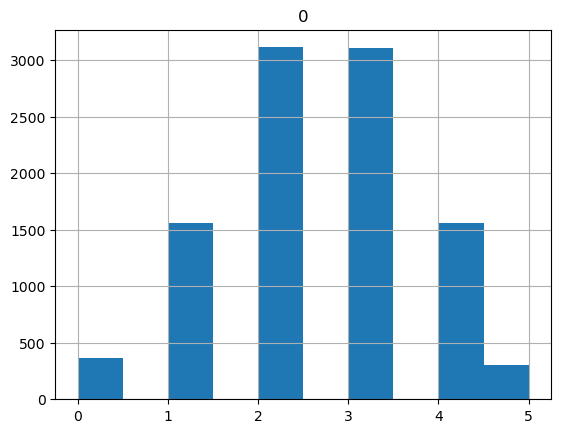

In [49]:
import pandas as pd
pd.DataFrame(game_condition).hist()